# Introduction to Gillespie Algorithm

- The Gillespie algorithm is a  stochastic method that is useful for systems where the number of entites is small enough that random fluctuations has a significant impact on system dynamics

- In stochastic processes, the next state of the system is not determined entirely by the current state, but invelve some randomness. This is in contrast with deterministic processes.

## Propensity
Propensity is a measure of the likelihood of an event occuring in a small time interval

## Algorithm steps:
1. Initialisation
2. Rate Calculation
3. Time to next event 
4. Even selection 
5. State update
6. Iteration

## Applied to Population Dynamics

Propensity in population Dynamics:
- Birth propensity: Given a birth rate $\lambda$, the propensity for a birth event when there are $N$ individuals is  $\lambda \cdot N$
- Death propensity: Given a death rate $\mu$, the propensity for a death event is $\mu \cdot N$

### Time to next event
The time to the next event (either birth or death) is determined by the total propensity of all events, $a_o = \lambda \cdot N + \mu \cdot N$. The time $\Delta t$ to the next event is sample from an exponential distribution with parameter $a_0$:

$P(\Delta t) = a_0 \exp(-a_0 \Delta t)$

### Event seletion 
With the probabilities of birth and death $P(birth) = \frac{\lambda \cdot N}{a_0}$ and $P(death) = \frac{\mu \cdot N}{a_0}$. 
The Gillespie algorithm selects which event occurs next based on the probalities

### Algorithm steps

1. **Initialization**: Define the initial population size $N$ and set the initial time.
2. **Calculate Propensities**: Compute the birth and death propensities based on the current population size.
3. **Determine $\Delta t$**: Sample the time to the next event from an exponential distribution with mean $1/a_0$.
4. **Select Event**: Choose a birth or death event to occur next, based on their relative probabilities.
5. **Update Population**: Increment or decrement the population size according to the selected event.
6. **Advance Time**: Update the system time by $\Delta t$ and repeat from step 2 until reaching a specified end condition.

## Gillespie Simulation Specific to Population growth

<function matplotlib.pyplot.show(close=None, block=None)>

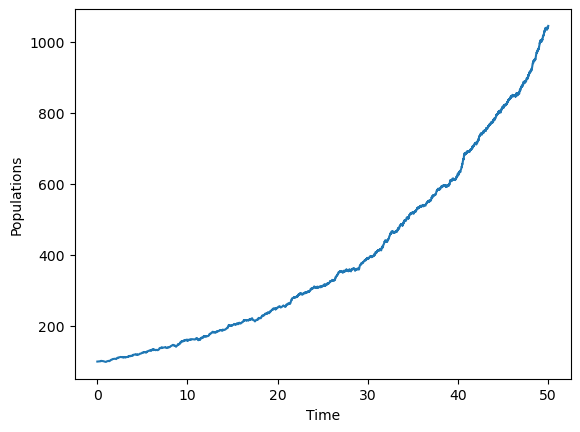

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Propensity parameters
birth_rate = 0.1
death_rate = 0.05

# initial parameters
initial_population = 100
max_time = 50

#initialize simulations
population = initial_population
time = 0
times = [time]             # place holder for saved times
populations = [population] # place holder saved populations

# Gillespie simulation

while time < max_time:
    if population == 0:
        break # extintion

    # calculate propensties
    birth_propensity = birth_rate * population
    death_propensity = death_rate * population
    total_propensities = birth_propensity + death_propensity

    #Determine time to next event
    # sample from an exponential distribution
    time_to_next = np.random.exponential(1/total_propensities) 
    time += time_to_next

    #select event
    # pick random number between 0 and 1
    if np.random.random() < birth_propensity/total_propensities:
        population += 1
    else:
        population -= 1
    #record the results
    times.append(time)
    populations.append(population)

#plot the results
plt.plot(times, populations)
plt.xlabel('Time')
plt.ylabel('Populations')
plt.show

### 2-species: predator-prey stochastic model

In [6]:
# initial state
initial_prey_population = 100
initial_predator_population =10

#Propensities
prey_birth_rate = 0.05
predation_rate = 0.001
predator_birth_rate = 0.001
predator_death_rate = 0.1

#initialize simulation
prey_population = initial_prey_population
predator_population = initial_predator_population
time = 0
max_time = 1000

#history
time_history = [time]
prey_population_history = [prey_population]
predator_population_history = [predator_population]

#Gillespie simulation
while time < max_time:
    if prey_population == 0 or predator_population == 0:
        break
    prey_birth_propensity = prey_birth_rate * prey_population
    predation_propensity = predation_rate * prey_population * predator_population
    predator_birth_propensity = predator_birth_rate * predator_population * prey_population
    predator_death_propensity = predator_death_rate * predator_population
    total_propensity = prey_birth_propensity + predation_propensity + predator_birth_propensity + predator_death_propensity

    #determine time to next event
    time_to_next = np.random.exponential(1/total_propensity)
    time += time_to_next

    #determine next event
    #random number (0, total_propensity)

    random_value = np.random.random() * total_propensity
    if random_value < prey_birth_propensity:
        prey_population += 1
    elif random_value < prey_birth_propensity + predation_propensity:
        prey_population -= 1
        predator_population += 1
    elif random_value < prey_birth_propensity + predation_propensity + predator_birth_propensity:
        predator_population += 1
    else:
        predator_population -=1
    
    #save the results
    time_history.append(time)
    prey_population_history.append(prey_population)
    predator_population_history.append(predator_population)

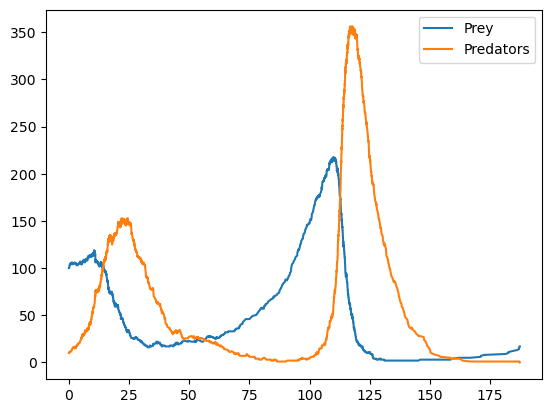

In [7]:
#Plot the results
plt.figure()
plt.plot(time_history, prey_population_history, label='Prey')
plt.plot(time_history, predator_population_history, label='Predators')
plt.legend()

## Run Multiple

In [8]:
## Function for running repeats
def run_multiple(repeats = 2):
    #np.random.seed(1000)

    # initial state
    initial_prey_population = 100
    initial_predator_population =10

    #Propensities
    prey_birth_rate = 0.05
    predation_rate = 0.001
    predator_birth_rate = 0.001
    predator_death_rate = 0.1

    max_time = 100

    results = {}
    for n in range(repeats):
        #initialize simulation
        prey_population = initial_prey_population
        predator_population = initial_predator_population
        time = 0

        #history
        results[n] = {
            "time_history":[time], 
            "prey_history":[prey_population], 
            "predator_history":[predator_population]}

        #Gillespie simulation
        while time < max_time:
            if prey_population == 0 or predator_population == 0:
                break
            prey_birth_propensity = prey_birth_rate * prey_population
            predation_propensity = predation_rate * prey_population * predator_population
            predator_birth_propensity = predator_birth_rate * predator_population * prey_population
            predator_death_propensity = predator_death_rate * predator_population
            total_propensity = prey_birth_propensity + predation_propensity + predator_birth_propensity + predator_death_propensity

            #determine time to next event
            time_to_next = np.random.exponential(1/total_propensity)
            time += time_to_next

            #determine next event
            #random number (0, total_propensity)
            random_value = np.random.random() * total_propensity
            if random_value < prey_birth_propensity:
                prey_population += 1
            elif random_value < prey_birth_propensity + predation_propensity:
                prey_population -= 1
                predator_population += 1
            elif random_value < prey_birth_propensity + predation_propensity + predator_birth_propensity:
                predator_population += 1
            else:
                predator_population -=1
            
            #save the results
            results[n]["time_history"].append(time)
            results[n]["prey_history"].append(prey_population)
            results[n]["predator_history"].append(predator_population)
    
    return results


In [9]:
def plot_multiple(results):
    plt.figure(figsize=(10,10))
    for repeats, result in results.items():
        time_history = result["time_history"]
        prey_population_history = result["prey_history"]
        predator_population_history= result["predator_history"]
        plt.plot(time_history, prey_population_history, label='Prey' if repeats==0 else "", color="green")
        plt.plot(time_history, predator_population_history, label='Predator' if repeats==0 else "", color="red")
    plt.xlabel('Population')
    plt.ylabel('Time')
    plt.legend()
    plt.show

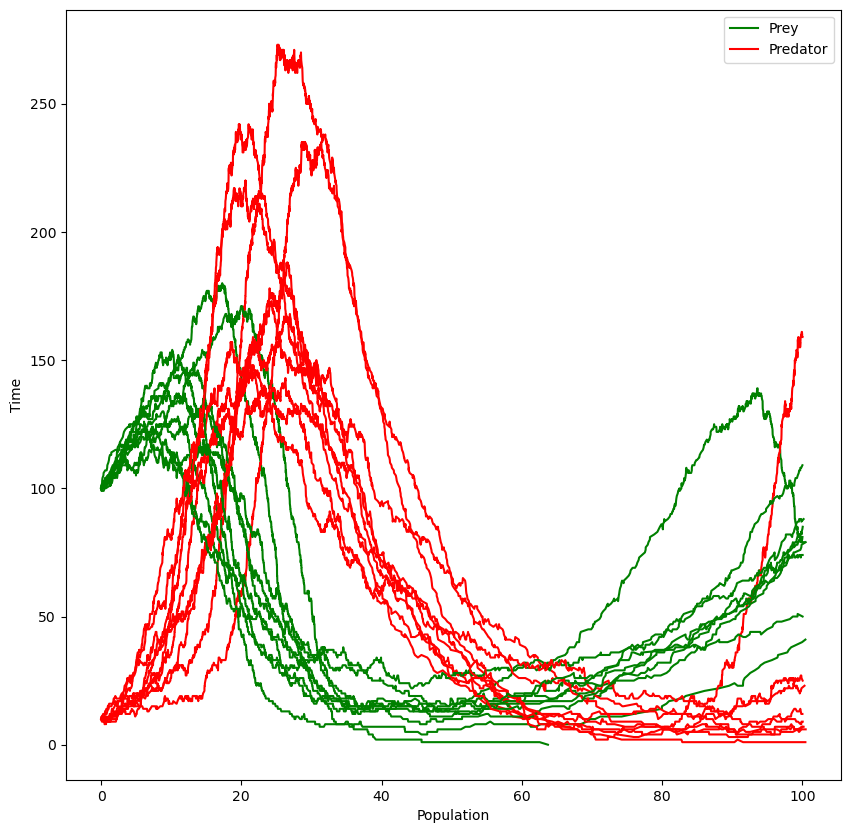

In [10]:
results = run_multiple(10)
plot_multiple(results)